<a href="https://colab.research.google.com/github/ManasPhanse/Geeky/blob/master/WP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import pandas as pd
import io
import warnings
import sklearn
import datetime
import matplotlib.pyplot as plt

In [2]:
from sklearn import pipeline, preprocessing, metrics, model_selection, ensemble
from sklearn_pandas import DataFrameMapper
from datetime import datetime

In [3]:
from google.colab import files
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory.csv


Reading Extracted Weather Data (TEMPERATURE in Celsius)

In [4]:
weather = pd.read_csv(io.BytesIO(uploaded["weatherHistory.csv"]), encoding= 'unicode_escape', index_col='Formatted Date')
weather

,Temperature (°C)
Formatted Date,
15-04-21,30.2
16-04-21,29.6
17-04-21,30.1
18-04-21,31.0
19-04-21,30.3
20-04-21,30.0
21-04-21,29.9
22-04-21,30.3
23-04-21,30.2


Plotting the Original Weather Data (Temperature)

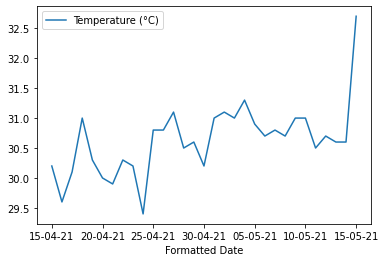

In [5]:
weather.plot()

Training the Weather Data

In [6]:
X = weather.values
train = X[0:15]
train = train.reshape(-1,1)
test = X[15:]
predictions = []

In [7]:
train.size

15

Using Auto-Regression Algorithm for predictions

In [8]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [10]:
predictions = model_ar_fit.predict(start=15, end=30)

Results in NumPy Arrays

In [11]:
test

array([[30.2],
       [31. ],
       [31.1],
       [31. ],
       [31.3],
       [30.9],
       [30.7],
       [30.8],
       [30.7],
       [31. ],
       [31. ],
       [30.5],
       [30.7],
       [30.6],
       [30.6],
       [32.7]])

In [12]:
predictions

array([3.59384111e+01, 4.77913542e+01, 9.57994224e+01, 2.52046924e+02,
       7.84037430e+02, 2.59460045e+03, 8.75210640e+03, 2.97407338e+04,
       1.01202328e+05, 3.44567990e+05, 1.17330030e+06, 3.99539246e+06,
       1.36055637e+07, 4.63313355e+07, 1.57773453e+08, 5.37270691e+08])

Results in Graph

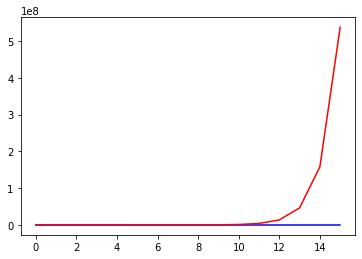

In [13]:
plt.plot(test, color='blue')
plt.plot(predictions, color='red')

Measuring Accuracy

In [14]:
acc = mean_squared_error (y_pred=predictions,y_true=test)

In [15]:
acc

1.9743836421773148e+16